# Data mining ======== Lab=========== K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df = df.iloc[:, [3, 4]]

In [6]:
import copy
old_df = copy.deepcopy(df)

### Choose random k

In [7]:
def intial_centroids(df,k =2):
    mydf1 = df
    min = mydf1.min()
    max = mydf1.max()
    col = mydf1.shape[1]
    center = {
        i+1 :[np.random.randint(min[j],max[j]) for j in range (df.shape[1]) ]
        for i in range(k)
          }
    return center

In [8]:
centroids = intial_centroids(df,k =5)
old_centroids = copy.deepcopy(centroids)
centroids

{1: [44, 21], 2: [81, 63], 3: [28, 42], 4: [117, 69], 5: [135, 51]}

### Colormap

In [9]:
def cmap():
    c_code =[ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
             '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
             '#9a6324','#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
             '#000075', '#808080', '#ffffff', '#000000']
    num = len(c_code)
    key = [i for i in range(num)]
    Cmap = dict(zip(key,c_code))
    return Cmap

In [10]:
cmap = cmap()
cmap

{0: '#e6194b',
 1: '#3cb44b',
 2: '#ffe119',
 3: '#4363d8',
 4: '#f58231',
 5: '#911eb4',
 6: '#46f0f0',
 7: '#f032e6',
 8: '#bcf60c',
 9: '#fabebe',
 10: '#008080',
 11: '#e6beff',
 12: '#9a6324',
 13: '#fffac8',
 14: '#800000',
 15: '#aaffc3',
 16: '#808000',
 17: '#ffd8b1',
 18: '#000075',
 19: '#808080',
 20: '#ffffff',
 21: '#000000'}

In [11]:
def distance(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (np.sqrt((df['Annual Income (k$)']-centroids[i][0])**2
                                                    +(df['Spending Score (1-100)']-centroids[i][1])**2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1,skipna=True)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from')))
    df['color'] = df['closest'].map(lambda x: cmap[x])
    return df

In [12]:
df = distance(df,centroids)
df.head()

,Annual Income (k$),Spending Score (1-100),distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,closest,color
0,15,39,34.132096,70.228199,13.341664,106.320271,120.598507,3,#4363d8
1,15,81,66.640828,68.410526,41.109610,102.703457,123.693169,3,#4363d8
2,16,6,31.764760,86.452299,37.947332,119.037809,127.224212,1,#3cb44b
3,16,77,62.609903,66.490601,37.000000,101.316336,121.807225,3,#4363d8
4,17,40,33.015148,68.007353,11.180340,104.120123,118.511603,3,#4363d8


In [13]:
def new_centroids(k):
    for i in centroids.keys():
        centroids[i][1] = np.mean(df[df['closest'] == i]['Annual Income (k$)'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Spending Score (1-100)'])
    return k

# Convergence condation    

In [14]:
while True:
    closet_centroids = df['closest'].copy(deep = True)
    centroids =new_centroids(centroids)
    df  = distance(df,centroids)
    if closet_centroids.equals(df['closest']):
        break

In [15]:
df = distance(df,centroids)

In [16]:
df.head()

,Annual Income (k$),Spending Score (1-100),distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,closest,color
0,15,39,29.026383,77.203935,41.646205,110.213713,121.655251,1,#3cb44b
1,15,81,52.062108,66.028637,13.226041,102.000306,135.070352,3,#4363d8
2,16,6,42.342294,97.786063,73.550736,125.652547,119.707978,1,#3cb44b
3,16,77,48.203369,65.032494,12.101649,101.069592,132.382023,3,#4363d8
4,17,40,27.092535,74.975572,40.103316,107.984084,119.854078,1,#3cb44b


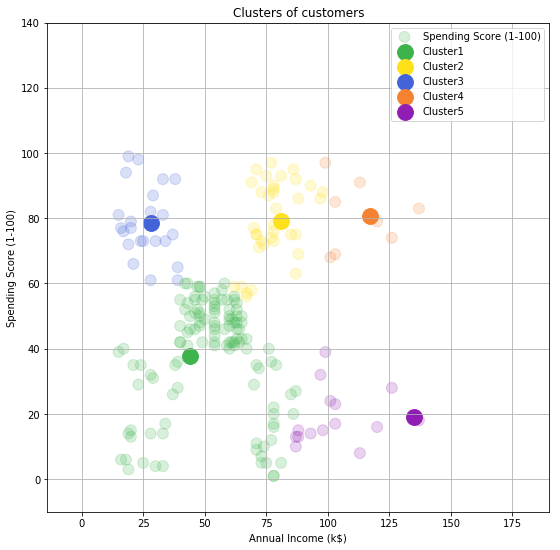

In [17]:
fig = plt.figure(figsize = (9,9))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color = df['color'],alpha = 0.2,s =120)
for i in centroids.keys():
    plt.scatter(*centroids[i],color = cmap[i],s =250, label= 'Cluster'+str(i))
plt.title('Clusters of customers')
plt.grid()
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.xlim(-14,190)
plt.ylim(-10,140)
plt.show()